<h1>DATA ANALYSIS FOR SALARY DATASET</h1>

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<h2>DATA EDA AND CLEANING</h2>

In [38]:
df = pd.read_csv(r"C:\Users\Oluba\Documents\Data analysis, Angela\archive\Salary_Dataset_DataScienceLovers.csv")
print(df.shape)
df.head()

(22770, 8)


,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [39]:
df.isna().sum()

Rating               0
Company Name         1
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

In [40]:
df = df.dropna()

In [41]:
df.duplicated().sum()

0

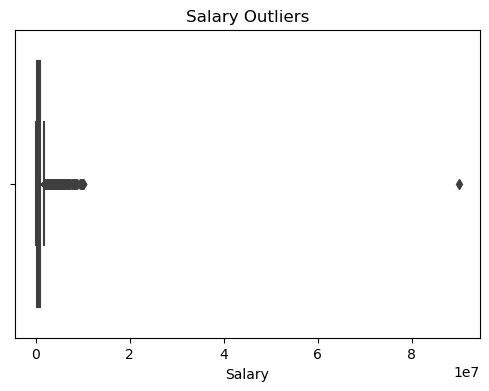

In [42]:
plt.figure(figsize=(6,4))      
sns.boxplot(x = df['Salary'])  

plt.title("Salary Outliers")   
plt.show()                     

In [43]:
# Calculate quartile

Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

In [44]:
# Calculate IQR

lower_limit = Q1 - 1.5 * IQR

upper_limit = Q3 + 1.5 * IQR

In [45]:
# Lower outlier limit

df = df[(df['Salary'] >= lower_limit) & (df['Salary'] <= upper_limit)]

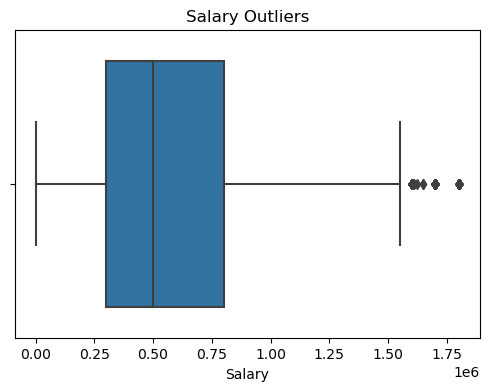

In [46]:
# Visualizing Outlier Again - Second Time

plt.figure(figsize=(6,4))      # Create figure
sns.boxplot(x = df['Salary'])  # Box plot

plt.title("Salary Outliers")   # Set title
plt.show()                     # Show plot

In [47]:
# Calculate quartile

Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

In [48]:
# Calculate IQR

lower_limit = Q1 - 1.5 * IQR

upper_limit = Q3 + 1.5 * IQR

In [49]:
# Lower outlier limit

df = df[(df['Salary'] >= lower_limit) & (df['Salary'] <= upper_limit)]

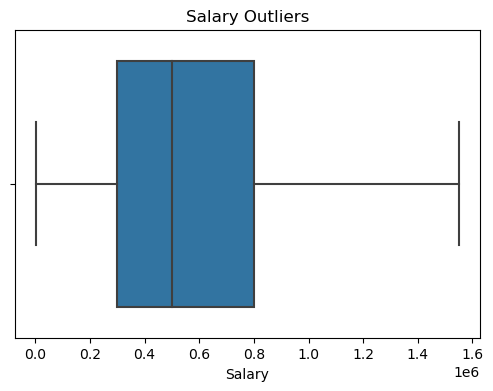

In [50]:
# Visualizing Outlier - Third Time - No Outlier Detected

plt.figure(figsize=(6,4))         # Create figure
sns.boxplot(x = df['Salary'])     # Box plot

plt.title("Salary Outliers")      # Set title
plt.show()                        # Show plot

In [75]:
df.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [81]:
avg = df.pivot_table(index='Job Roles', values="Salary", aggfunc={'Salary':'mean'})
avg.sort_values('Salary', ascending=False)


,Salary
Job Roles,
Database,702554.768392
SDE,648108.015461
IOS,593214.068241
Mobile,589857.819905
Backend,529104.564347
Frontend,501977.282203
Android,483352.318634
Java,475832.116985
Testing,464824.757895


<h2>Q1: Which Job Roles have Highest Average Salary?</h2>

In [87]:
avg = df.pivot_table(index='Job Roles', values="Salary", aggfunc=({'Salary':'mean'}))
avg.sort_values('Salary', ascending=False)

,Salary
Job Roles,
Database,702554.768392
SDE,648108.015461
IOS,593214.068241
Mobile,589857.819905
Backend,529104.564347
Frontend,501977.282203
Android,483352.318634
Java,475832.116985
Testing,464824.757895


In [89]:
av = df.groupby('Job Roles').agg({"Salary":"mean"}).round(2)
av.sort_values('Salary', ascending=False)

,Salary
Job Roles,
Database,702554.77
SDE,648108.02
IOS,593214.07
Mobile,589857.82
Backend,529104.56
Frontend,501977.28
Android,483352.32
Java,475832.12
Testing,464824.76


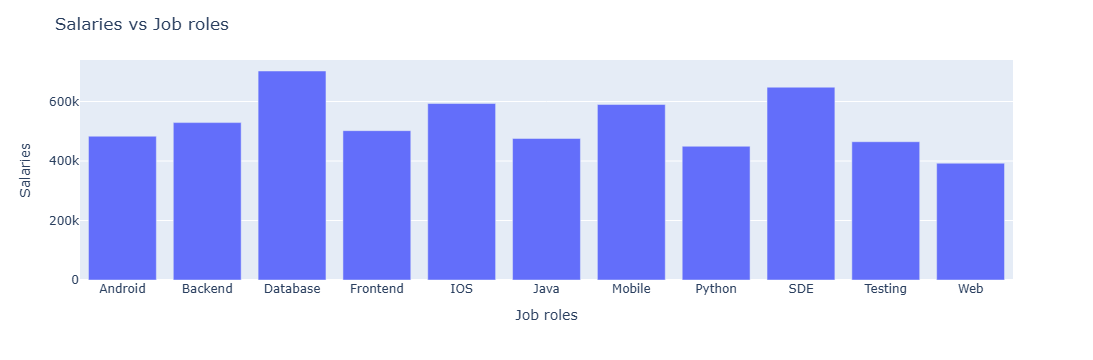

In [154]:
fig = px.bar(x = av.index, y = av.Salary).update_layout(xaxis_title = 'Job roles', yaxis_title = 'Salaries', title='Salaries vs Job roles')

fig.show()

<h2>Q2: Which Cities Offer Highest Average Salary?</h2>

In [90]:
a = df.groupby('Location').agg({"Salary":"mean"}).round(2)
a.sort_values('Salary', ascending=False)

,Salary
Location,
Mumbai,702195.87
Bangalore,568140.30
Jaipur,566153.85
Pune,562387.14
New Delhi,542717.06
Hyderabad,538809.57
Kolkata,532604.94
Kerala,514965.74
Chennai,505102.45


Text(0, 0.5, 'Salary')

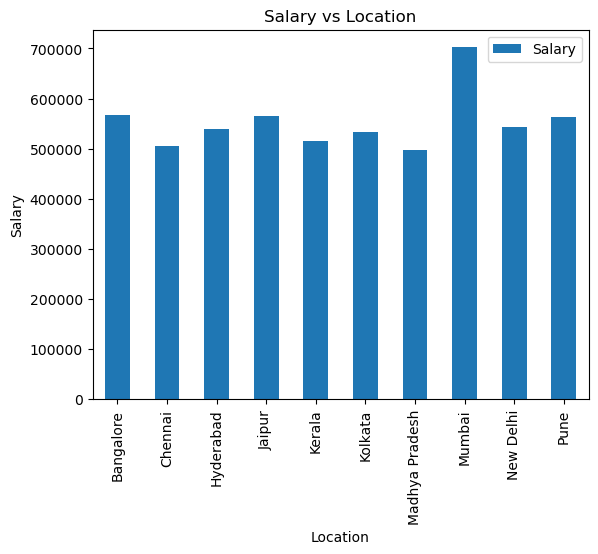

In [127]:

a.plot(kind='bar')
plt.title('Salary vs Location')
plt.ylabel('Salary')

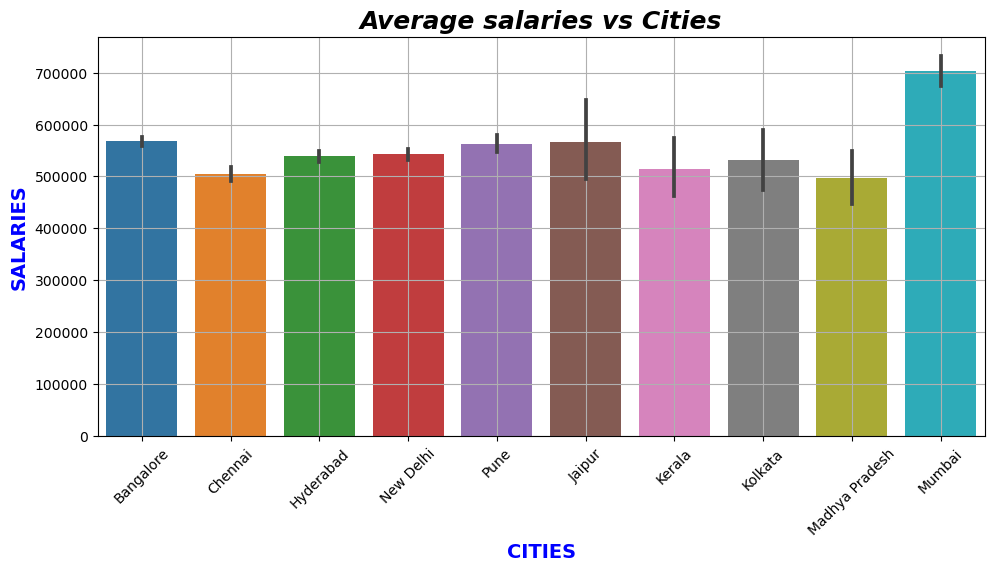

In [182]:
plt.figure(figsize=(10, 5))
plt.title("Average salaries vs Cities", fontsize=18, color='black', fontstyle="italic", fontweight='bold')
fig = sns.barplot(data=df, x='Location', y="Salary")
plt.tight_layout()
plt.xticks(rotation=45)
plt.xlabel('CITIES', color='blue', fontsize=14, fontweight="bold")
plt.ylabel('SALARIES', color='blue', fontsize=14, fontweight="bold")
plt.grid()
#fig.set(xlabel='CITIES', ylabel='AVERAGE SALARY')

<h2>Q3: Name those 5 companies located in 'New Delhi' with Ratings of '5', offering highest & lowest salaries.</h2>

In [53]:
delhi = df[(df["Location"] == "New Delhi") & (df["Rating"] == 5.0)]
lowest = delhi.sort_values("Salary").head()
lowest["Company Name"]


18680            Atom 8
2334      Hopin (India)
17524    Star Catalysts
1969      WorkingNation
1723         Neo Fitnes
Name: Company Name, dtype: object

In [54]:
highest = delhi.sort_values("Salary", ascending=False).head()
highest["Company Name"]

6750                      Hapramp
1888                     Trillbit
17488     The Art of Mike Mignola
8284     Silicon Valley Recycling
17351             Parth Universal
Name: Company Name, dtype: object

<h2>Q4: Which Job Title has the highest number of salary reported?</h2>

In [55]:
print(df.sort_values("Salaries Reported", ascending=False).head(1)["Job Title"])

19813    Test Engineer
Name: Job Title, dtype: object


<h2>Q5: Which 10 Companies provide the highest average salary, when at least 20 employees have reported their salaries?</h2>

In [150]:
cf = df[df["Salaries Reported"] >= 20]
cf = cf.groupby("Company Name").agg({"Salary":'mean'}).round()
cf_10 = cf.sort_values("Salary", ascending=False).head(10)
cf_10

,Salary
Company Name,
Expedia Group,1350000.0
Nokia,1200000.0
Amadeus,1200000.0
Ola,1000000.0
Alcatel-Lucent,1000000.0
Lumen,900000.0
Kony,900000.0
Microsoft,784571.0
Cisco Systems,700000.0


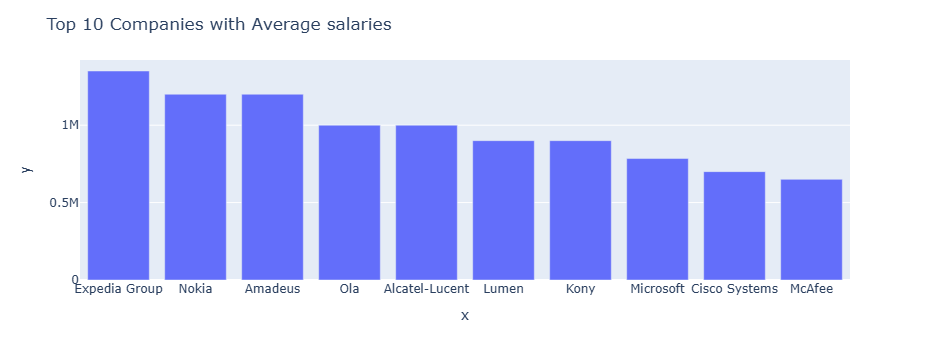

In [156]:
px.bar(x = cf_10.index, y = cf_10.Salary).update_layout(title='Top 10 Companies with Average salaries')

<h2>Q.6: Check and show the relationship Between Ratings & Salaries</h2>

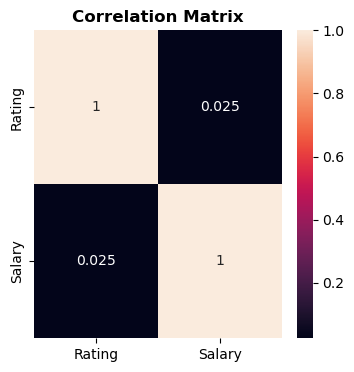

         Rating   Salary
Rating  1.00000  0.02476
Salary  0.02476  1.00000


In [181]:
correl = df[["Rating", "Salary"]].corr()
plt.figure(figsize = (4, 4))
sns.heatmap(correl, annot = True)
plt.title('Correlation Matrix', fontweight='bold')
plt.show()
print(correl)

<h1>Q.7: Does employment status affect salary?</h1>

Text(0, 0.5, 'Salary in $')

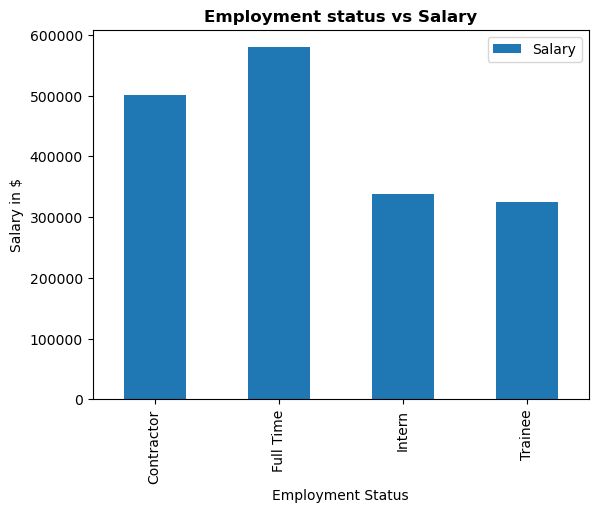

In [180]:

pivot = df.pivot_table(index="Employment Status", values="Salary", aggfunc={"Salary":"mean"})
pivot
pivot.plot(kind='bar')
plt.title('Employment status vs Salary', fontweight='bold')
plt.ylabel('Salary in $')

<h1>Q.8: Which job roles are most common?</h1>

In [61]:
df["Job Roles"].value_counts()

Job Roles
SDE         7244
Android     2812
Frontend    2034
Java        1778
Testing     1710
IOS         1524
Backend     1049
Web          988
Python       929
Database     734
Mobile       211
Name: count, dtype: int64

<h1>Q.9: How does average salary change as company rating increases?</h1>

In [174]:
tab = df[['Rating','Salary']]
tab = tab.groupby('Rating').agg({'Salary':'mean'}).round()


In [72]:
table = df[['Rating','Salary']]


table["Rating"] = table["Rating"].rolling(window=20).mean()
table["Salary"] = table["Salary"].rolling(window=20).mean()

C:\Users\Oluba\AppData\Local\Temp\ipykernel_20172\1049946952.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table["Rating"] = table["Rating"].rolling(window=20).mean()
C:\Users\Oluba\AppData\Local\Temp\ipykernel_20172\1049946952.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table["Salary"] = table["Salary"].rolling(window=20).mean()


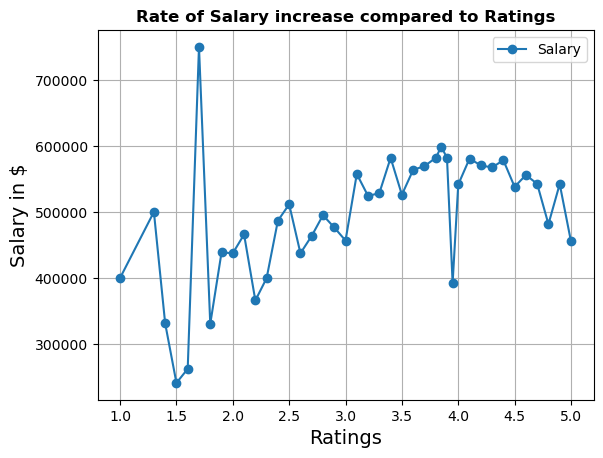

In [179]:
tab.plot(kind='line', marker='o')
plt.ylabel('Salary in $', fontsize=14)
plt.xlabel('Ratings', fontsize=14)
plt.title('Rate of Salary increase compared to Ratings', fontweight='bold')
plt.grid()

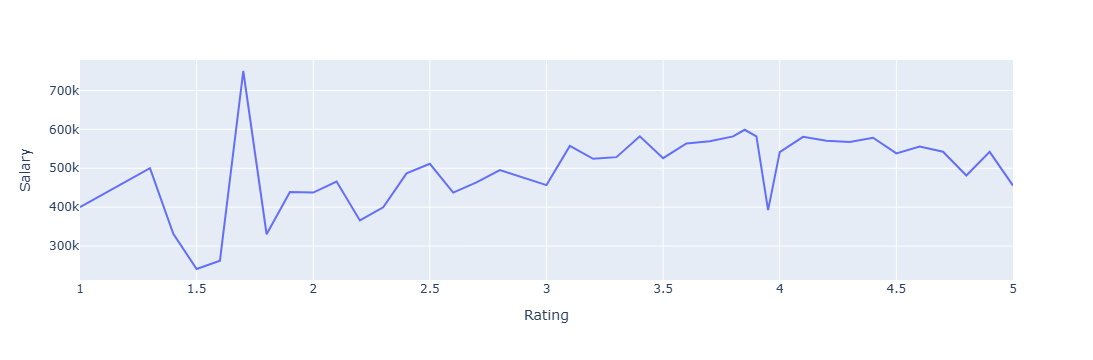

In [171]:
px.line(tab, x=tab.index, y='Salary')

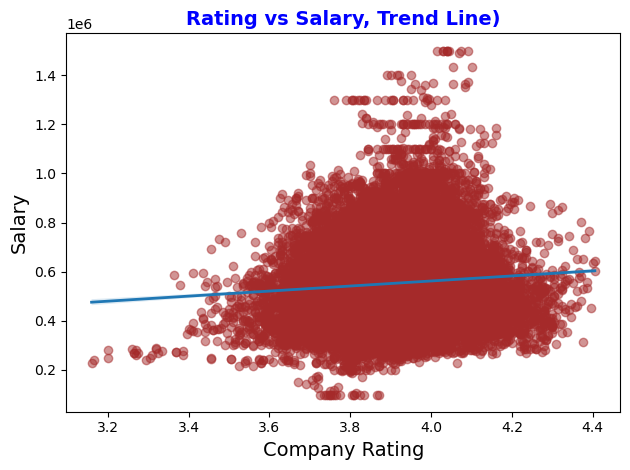

In [178]:
sns.regplot(x="Rating", y="Salary", data=table, scatter_kws={"alpha": 0.5, "color": "brown"}, line_kws={"linewidth": 2})

plt.title("Rating vs Salary, Trend Line)", fontsize=14, fontweight="bold", color='b')
plt.xlabel("Company Rating", fontsize=14)
plt.ylabel("Salary", fontsize=14)
plt.tight_layout()              # Adjust spacing
plt.show()